In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [5]:
df=pd.read_csv('regression_data1.csv',sep=',')
df.head()

,x,y
0,0.431086,0.794687
1,0.676032,0.339175
2,-1.215988,-1.176260
3,0.534917,0.025879
4,-0.256216,-0.435692


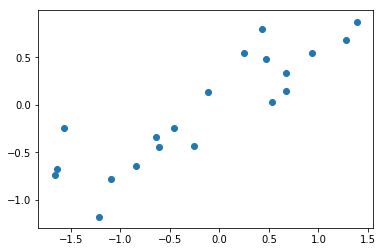

In [6]:
x=df.values[:,0]
y=df.values[:,1]
plt.scatter(x,y)
plt.show()


In [7]:
#split into two sets
X_train, X_test, y_train, y_test = train_test_split(x,y,random_state=21,test_size=0.25)

In [8]:
print(x)
print(X_train)
print(X_test)

[ 0.43108623  0.6760324  -1.21598798  0.53491696 -0.25621586  0.93289422
 -0.45723337  0.66867924 -1.09651582  1.27842935  1.38984882 -0.84284664
  0.24382061 -0.60836362 -1.56549132 -0.11143074 -1.66259013 -0.63474368
  0.46819744 -1.63303761]
[-0.63474368  0.46819744 -0.84284664 -0.45723337 -1.56549132  0.6760324
 -1.21598798  0.24382061  0.53491696 -1.09651582  0.43108623 -1.66259013
 -0.25621586 -0.11143074  1.27842935]
[ 0.66867924  1.38984882 -1.63303761 -0.60836362  0.93289422]


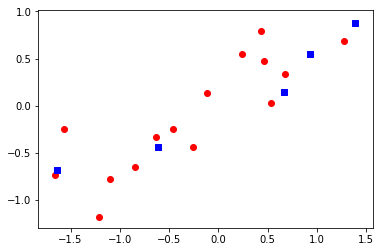

In [8]:
plt.scatter(X_train,y_train,color='r',marker='o',label='trainset')
plt.scatter(X_test,y_test,color='b',marker='s',label='testset')
plt.show()

### Linear Model (y=wx+b)



In [3]:
linReg=LinearRegression()

In [9]:
linReg.fit(X_train,y_train) #두 셋의 rank 가 다름

ValueError: Expected 2D array, got 1D array instead:
array=[-0.63474368  0.46819744 -0.84284664 -0.45723337 -1.56549132  0.6760324
 -1.21598798  0.24382061  0.53491696 -1.09651582  0.43108623 -1.66259013
 -0.25621586 -0.11143074  1.27842935].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [10]:
print(X_train.shape, y_train.shape) #1차원, 뒤에0

(15,) (15,)


In [11]:
X_train=X_train.reshape(-1,1)
y_train=y_train.reshape(-1,1)
X_test=X_test.reshape(-1,1)
y_test=y_test.reshape(-1,1)



In [12]:
print(X_train.shape,y_train.shape) #2차원, 뒤에1

(15, 1) (15, 1)


In [13]:
# training and attributes
linReg.fit(X_train,y_train)
print(linReg.coef_) # 계수
print(linReg.intercept_) #y절편

[[0.56842246]]
[0.05308463]


In [14]:
#training set의 mean square error

y_pred=linReg.predict(X_train)
linTrainError=np.mean((y_pred - y_train)**2) #cost function
print(linTrainError)

0.09486178069994608


In [18]:
y_pred=linReg.predict(X_test)
linTestError=np.mean((y_pred - y_test)**2)
print(linTestError)

0.028924634280805418


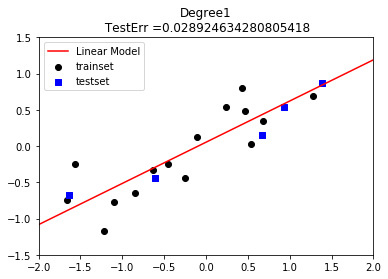

In [22]:
xval=np.linspace(-2,2,101).reshape(-1,1)
yval=linReg.predict(xval).reshape(-1,1)

plt.plot(xval,yval,color='red',label='Linear Model')
plt.scatter(X_train,y_train,color='k',marker='o',label='trainset')
plt.scatter(X_test,y_test,color='b',marker='s',label='testset')

plt.xlim((-2,2))
plt.ylim((-1.5,1.5))
plt.legend(loc='best')
plt.title("Degree{}\n TestErr ={}".format(1,linTestError))

plt.show()

### Quadaratic Regression (y=w1x+w2x^2+b)

In [26]:
from sklearn.preprocessing import PolynomialFeatures

In [28]:
#x, x^2 column 생성
quadPoly=PolynomialFeatures(degree=2,include_bias=False) #

In [31]:
X_train_poly2=quadPoly.fit_transform(X_train)
X_test_poly2=quadPoly.fit_transform(X_test)
print(X_train_poly2.shape, X_test_poly2.shape) #1,x,x^2

(15, 2) (5, 2)


In [32]:
quadReg=LinearRegression()

In [33]:
quadReg.fit(X_train_poly2,y_train)
print(quadReg.coef_)
print(quadReg.intercept_)

[[0.60648446 0.0655591 ]]
[0.0107167]


In [38]:
#training set의 mean square error

y_pred=quadReg.predict(X_train_poly2)
quadTrainError=np.mean((y_pred - y_train)**2)
print("training set error =", quadTrainError)

#test set의 mean square error
y_pred = quadReg.predict((X_test_poly2))
quadTestError=np.mean((y_pred-y_test)**2)
print("test set error=", quadTestError)

training set error = 0.09270519047789069
test set error= 0.027023831435931706


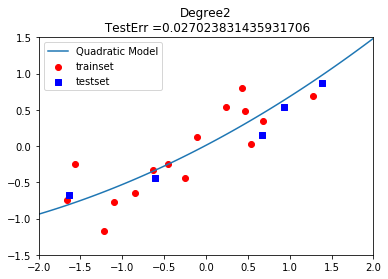

In [40]:
xval=np.linspace(-2,2,101).reshape(-1,1)
xval_poly2=quadPoly.fit_transform(xval)

yval=quadReg.predict(xval_poly2).reshape(-1,1)

plt.plot(xval,yval,label="Quadratic Model")
plt.scatter(X_train,y_train,color='r', marker='o', label='trainset')
plt.scatter(X_test,y_test,color='b',marker='s', label='testset')

plt.xlim((-2,2))
plt.ylim((-1.5,1.5))
plt.legend(loc="best")
plt.title("Degree{}\n TestErr ={}".format(2,quadTestError))

plt.show()

### Ridge (l2 regularization)

In [41]:
from sklearn.linear_model import Ridge

In [42]:
quadReg2=Ridge(alpha=.5)

In [43]:
quadReg2.fit(X_train_poly2, y_train)
print(quadReg2.coef_)
print(quadReg2.intercept_)

[[0.56637456 0.04099158]]
[0.01933832]


In [44]:
#training set의 mean square error
y_pred=quadReg2.predict(X_train_poly2)
quadTrainError=np.mean((y_pred - y_train)**2)
print("training set error=", quadTrainError)

y_pred=quadReg2.predict(X_test_poly2)
quadTestError=np.mean((y_pred - y_test)**2)
print("test set error=",quadTestError)

training set error= 0.09349600009234643
test set error= 0.020958990364176436


### Lasso (l1 Regularization)

In [45]:
from sklearn.linear_model import Lasso

In [46]:
quadReg3=Lasso(alpha=.1)